# Análise de Risco de AVC

## Objetivo

Utilizar o conjunto de dados para entender mais sobre ocorrências de AVC dentre as pessoas. Contendo diversos parâmetros, o foco será entender melhor como eles se relacionam, se o estilo de vida, tipo de trabalho ou até mesmo o estado civil seriam fatores relevantes que influenciam nas ocorrências do Acidente Vascular Cerebral.

## Estabelecendo o ambiente

In [1]:
# Importando as bibliotecas necessárias
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Os arquivos de leitura estarão presentes no diretório de caminho '../input'
# Por isso, ao rodar esta célula, serão listados todos os arquivos presentes na pasta 'input'

for dirname, _, filenames in os.walk('C:/Users/jeank/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/jeank/kaggle/input\healthcare-dataset-stroke-data.csv


In [3]:
path = 'C:/Users/jeank/kaggle/input\healthcare-dataset-stroke-data.csv'

In [4]:
df = pd.read_csv(path)

## Entendendo o dataset

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# Verificando a forma do dataset
print(f'Dataset contendo {df.shape[0]} linhas e {df.shape[1]} colunas')

Dataset contendo 5110 linhas e 12 colunas


In [7]:
# Transformando a coluna 'id' no índice para facilitar futuras referências
df.set_index('id', inplace=True)

In [8]:
# Verificando estatísticas descritivas das colunas numéricas
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
# Analisando os tipos de dados de cada coluna, e se há valores nulos que impactariam no decorrer da análise
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


### Limpando dados

#### Tradução de texto

In [10]:
# Traduzindo o nome das colunas para melhor entendimento
df.rename(
    columns={
        'date':'data',
        'gender':'genero',
        'age':'idade',
        'hypertension':'hipertensao',
        'heart_disease':'doenca_cardiaca',
        'ever_married':'ja_foi_casado',
        'work_type':'tipo_de_trabalho',
        'Residence_type':'tipo_de_residencia',
        'avg_glucose_level':'nivel_medio_glucose',
        'bmi':'imc',
        'smoking_status':'fumante',
        'stroke':'avc'
    },
    inplace=True
)

In [11]:
df.head()

,genero,idade,hipertensao,doenca_cardiaca,ja_foi_casado,tipo_de_trabalho,tipo_de_residencia,nivel_medio_glucose,imc,fumante,avc
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
pd.unique(df['genero'])

array(['Male', 'Female', 'Other'], dtype=object)

In [13]:
# Traduzindo a coluna 'genero'
traducao_genero = dict(Male='masculino',
                       Female='feminino',
                       Other='outro'
                      )
df.replace(traducao_genero, inplace=True)

In [14]:
pd.unique(df['ja_foi_casado'])

array(['Yes', 'No'], dtype=object)

In [15]:
# Traduzindo a coluna 'ja_foi_casado'
traducao_ja_foi_casado = dict(Yes='sim', No='nao')
df.replace(traducao_ja_foi_casado, inplace=True)

In [16]:
pd.unique(df['tipo_de_trabalho'])

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [17]:
# Traduzindo a coluna 'tipo_de_trabalho'
traducao_tipo_de_trabalho = {'Private':'privado',
                             'Self-employed':'autonomo',
                             'Govt_job':'publico',
                             'children':'crianca',
                             'Never_worked':'nunca_trabalhou'
                             }
df.replace(traducao_tipo_de_trabalho, inplace=True)

In [18]:
pd.unique(df['tipo_de_residencia'])

array(['Urban', 'Rural'], dtype=object)

In [19]:
# Traduzindo a coluna 'tipo_de_residencia'
traducao_tipo_de_residencia = dict(Urban='urbana', Rural='rural')
df.replace(traducao_tipo_de_residencia, inplace=True)

In [20]:
pd.unique(df['fumante'])

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [21]:
# Traduzindo a coluna 'fumante'
traducao_fumante = {'formerly smoked':'parou_de_fumar',
                   'never smoked':'nunca_fumou',
                   'smokes':'fuma',
                   'Unknown':'nao_respondeu'
                   }
df.replace(traducao_fumante, inplace=True)

In [22]:
df.head()

,genero,idade,hipertensao,doenca_cardiaca,ja_foi_casado,tipo_de_trabalho,tipo_de_residencia,nivel_medio_glucose,imc,fumante,avc
id,,,,,,,,,,,
9046,masculino,67.0,0,1,sim,privado,urbana,228.69,36.6,parou_de_fumar,1
51676,feminino,61.0,0,0,sim,autonomo,rural,202.21,NaN,nunca_fumou,1
31112,masculino,80.0,0,1,sim,privado,rural,105.92,32.5,nunca_fumou,1
60182,feminino,49.0,0,0,sim,privado,urbana,171.23,34.4,fuma,1
1665,feminino,79.0,1,0,sim,autonomo,rural,174.12,24.0,nunca_fumou,1


In [23]:
# Transformando a coluna 'idade' que está no tipo 'float' para o tipo 'int', para termos apenas a idade inteira do paciente
df['idade'] = df['idade'].astype(int)

#### Verificando valores duplicados e nulos

In [24]:
print(f'Valores duplicados: {df.duplicated().sum()}')

Valores duplicados: 0


Valores nulos: 

genero                   0
idade                    0
hipertensao              0
doenca_cardiaca          0
ja_foi_casado            0
tipo_de_trabalho         0
tipo_de_residencia       0
nivel_medio_glucose      0
imc                    201
fumante                  0
avc                      0
dtype: int64



<Axes: ylabel='id'>

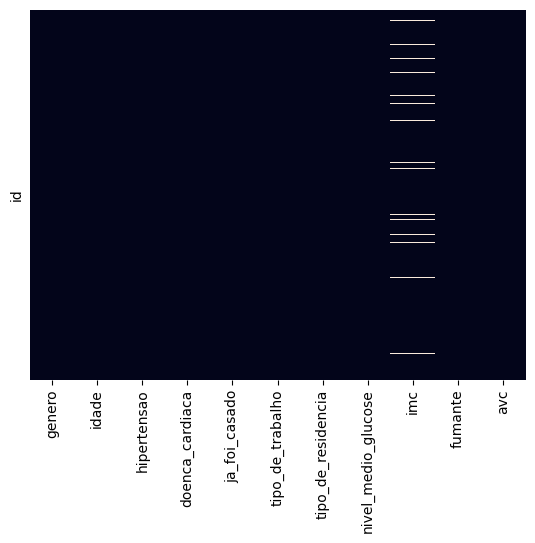

In [25]:
# Verificando quantidade de valores nulos no dataset
print(f'Valores nulos: \n\n{df.isnull().sum()}\n')
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

Valores nulos: 

genero                 0
idade                  0
hipertensao            0
doenca_cardiaca        0
ja_foi_casado          0
tipo_de_trabalho       0
tipo_de_residencia     0
nivel_medio_glucose    0
imc                    0
fumante                0
avc                    0
dtype: int64



<Axes: ylabel='id'>

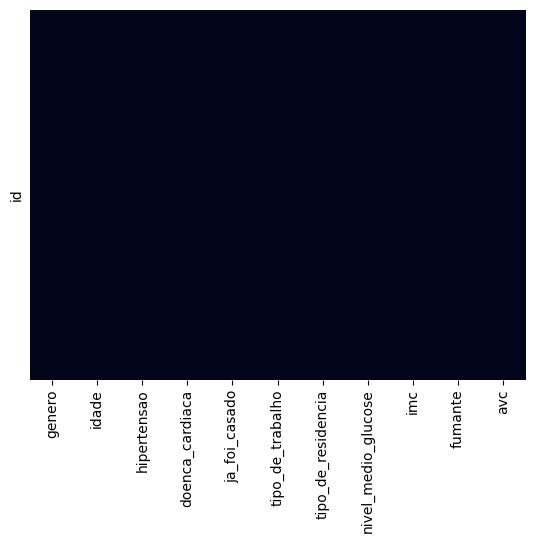

In [26]:
# Preenchendo valores nulos da coluna 'imc' nos baseando no gênero e na idade do paciente
df['imc'] = df.groupby(['idade','genero'])['imc'].transform(lambda x: x.fillna(x.median()))

print(f'Valores nulos: \n\n{df.isnull().sum()}\n')
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

## Descobrindo a quantidade de pacientes que sofreram AVC

### Análise numérica

In [27]:
# Criando o Dataframe que será utilizado para plotar o gráfico

# Utilizamos o .reset_index() para incluir a coluna 'stroke' no dataframe
pacientes_avc = df['avc'].value_counts().rename('contagem').reset_index()

# Substituímos os valores binários '0' e '1' por 'Não sofreram AVC' e 'Sofreram AVC', respectivamente, para facilitar na interpretação
pacientes_avc['avc'] = pacientes_avc['avc'].apply(lambda stroke: 'Não sofreram AVC' if stroke == 0 else 'Sofreram AVC')
pacientes_avc

,avc,contagem
0,Não sofreram AVC,4861
1,Sofreram AVC,249


### Plotagem

Text(0, -0.1, 'Total de entrevistados \n5110')

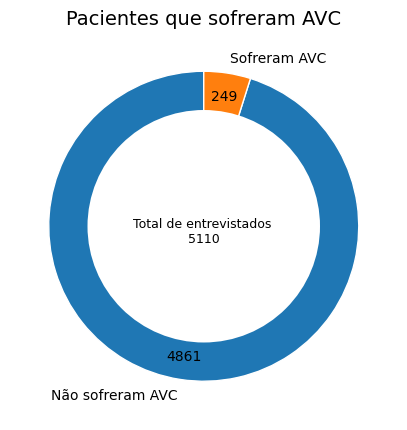

In [28]:
# Gráfico de Rosca

fig, ax = plt.subplots(figsize=(5, 8))

# Criando o gráfico, mudando o rótulo de percentil para o valor específico dos dados no parâmetro 'autopct', 
# e adicionando uma borda entre as fatias com o parâmetro 'wedgeprops'
ax.pie(
    pacientes_avc['contagem'], 
    labels=pacientes_avc['avc'], 
    autopct= lambda r: f'{int(round(r*sum(pacientes_avc["contagem"])/100)):d}',
    textprops={'color':'k'},
    pctdistance=0.85, 
    startangle=90, 
    wedgeprops={'linewidth': 1, 'edgecolor': 'w'}
)

ax.set_title('Pacientes que sofreram AVC', fontsize=14)

# Desenhando um círculo branco para criar o aspecto de rosca
circulo = plt.Circle((0, 0), 0.75, fc='w')

# Adicionando o círculo no gráfico
ax.add_artist(circulo)

# Adicionando o total de entrevistados no centro do gráfico para melhor visualização e entendimento
total_pacientes = pacientes_avc['contagem'].sum()
ax.annotate('Total de entrevistados \n' + str(total_pacientes),
            xy=(0, -0.1),
            fontsize=9, 
            ha="center"
           )

De um total de 5109 pacientes entrevistados, 4860 não sofreram um AVC, contra 249 pacientes que sofreram

## Explorando as colunas categóricas para primeiras impressões sobre AVC

### Análise numérica

In [29]:
# Aqui verificamos as identidades de gêrero preenchidas pelos pacientes 
df['genero'].value_counts()

genero
feminino     2994
masculino    2115
outro           1
Name: count, dtype: int64

In [30]:
# Identificamos que apenas um paciente respondeu como 'outro', logo, removeremos o valor que se diferencia significativamente dos demais
filtro = (df['genero'] == 'outro')
df.drop(index=df[filtro].index, inplace=True)

In [31]:
# Definindo colunas categóricas para análise
colunas_categoricas = [coluna for coluna in df.columns if df[coluna].dtype == 'object']

print('--------------------------------------------------------------')
for coluna in colunas_categoricas:
    contagem = df[coluna].value_counts()
    print(f'A coluna "{coluna}" possui {contagem.index.size} valores diferentes: \n')
    print(contagem)
    print('--------------------------------------------------------------\n')

--------------------------------------------------------------
A coluna "genero" possui 2 valores diferentes: 

genero
feminino     2994
masculino    2115
Name: count, dtype: int64
--------------------------------------------------------------

A coluna "ja_foi_casado" possui 2 valores diferentes: 

ja_foi_casado
sim    3353
nao    1756
Name: count, dtype: int64
--------------------------------------------------------------

A coluna "tipo_de_trabalho" possui 5 valores diferentes: 

tipo_de_trabalho
privado            2924
autonomo            819
crianca             687
publico             657
nunca_trabalhou      22
Name: count, dtype: int64
--------------------------------------------------------------

A coluna "tipo_de_residencia" possui 2 valores diferentes: 

tipo_de_residencia
urbana    2596
rural     2513
Name: count, dtype: int64
--------------------------------------------------------------

A coluna "fumante" possui 4 valores diferentes: 

fumante
nunca_fumou       1892
nao_

### Plotagem

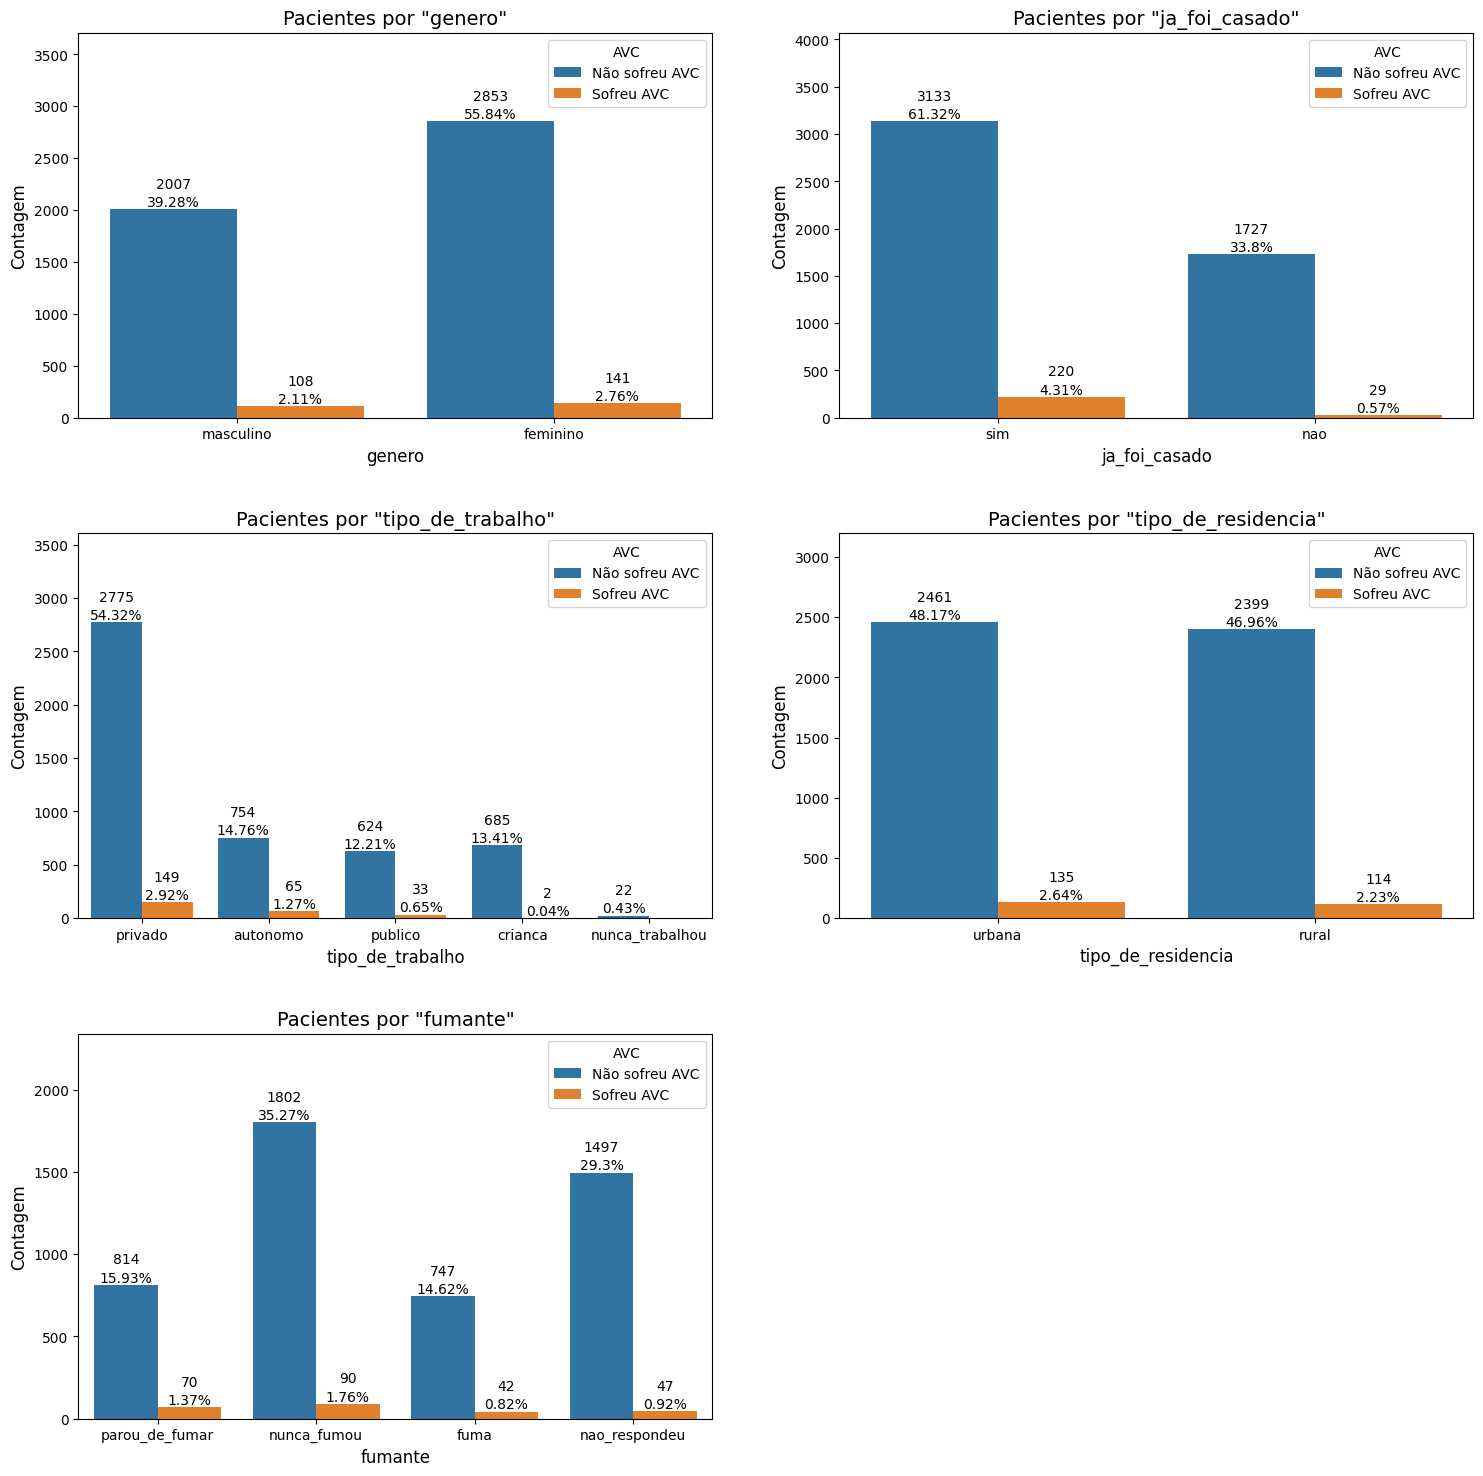

In [32]:
# Gráfico de barras

# Definindo função de plotagem dos múltiplos gráficos de barra baseados nas colunas categóricas
def plotagem_colunas_categoricas(dataframe, colunas):

    # Tamanho e espaçamento da figure para manter visualização limpa
    plt.figure(figsize=(18, 18))
    plt.subplots_adjust(wspace=.2, hspace=.3)
    
    # Definindo duas colunas e valor dinâmico de linhas para encaixe das visualizações na figure
    colunas_figure = 2
    linhas_figure = math.ceil((len(colunas)/2))

    for i, coluna in enumerate(colunas_categoricas, 1):

        # Através do método enumerate() conseguimos especificar a posição dos gráficos dinamicamente
        ax = plt.subplot(linhas_figure, colunas_figure, i)

        # Plotagem do gráfico adicionando o comparativo através do parâmetro 'hue'
        sns.countplot(x=dataframe[coluna], hue=dataframe['avc'])
        ax.set_title(f'Pacientes por "{coluna}"', fontsize=14)
        ax.set_xlabel(f'{coluna}', fontsize=12)
        ax.set_ylabel('Contagem',  fontsize=12)

        # Adicionando margem superior para permitir visualização dos rótulos de dados
        ax.margins(y=0.3)

        # Mudando a legenda para melhor entendimento
        plt.legend(title='AVC', loc=0, labels=['Não sofreu AVC', 'Sofreu AVC'])

        # Como utilizamos o 'hue', temos múltiplos containers nos gráficos. Acessaremos individualmente para adicionar os rótulos
        for container in ax.containers:
            ax.bar_label(container, padding=13)
            ax.bar_label(
                container,
                labels = [f'{round((x.get_height())*100/(dataframe[coluna].value_counts().values.sum()),2)}%' for x in container],
                label_type='edge'
            )

# Usando a função definida para a plotagem
plotagem_colunas_categoricas(df, colunas_categoricas)

Fazendo um comparativo com o número de pacientes entrevistados que sofreram um AVC, podemos perceber alguns insights interessantes:
- Apesar do número de mulheres que sofreram AVC ser maior, a porcentagem de homens que sofreram AVC do total de entrevistados é superior, mostrando que o acidente é mais comum entre os homens.
- Pessoas casadas tem maior tendência a sofrer AVC.
- Os pacientes entrevistados que trabalham no setor privado foram 2x mais afetados que os que são autônomos e 4x mais que os que trabalham no setor público.
- Morar na zona rural ou urbana não apresentou diferença significativa para identificar padrões.

## Distribuindo o número de pessoas por idade comparando os que sofreram com os que não sofreram um AVC

### Análise numérica

In [33]:
# Verificação da distribuição de pacientes por idade

# Utilizamos o .reset_index() para incluir a coluna 'idade' no dataframe
dist_idade = df['idade'].value_counts().rename('contagem').reset_index()
dist_idade

,idade,contagem
0,78,102
1,57,95
2,52,90
3,54,87
4,51,86
...,...,...
78,11,36
79,10,35
80,4,34
81,7,32


In [34]:
# Criando dataframe para análise de AVC dos pacientes por idade e gênero
filtro_m = (df['genero'] == 'masculino')
filtro_f = (df['genero'] == 'feminino')

df_m = df[filtro_m]
df_f = df[filtro_f]

### Plotagem

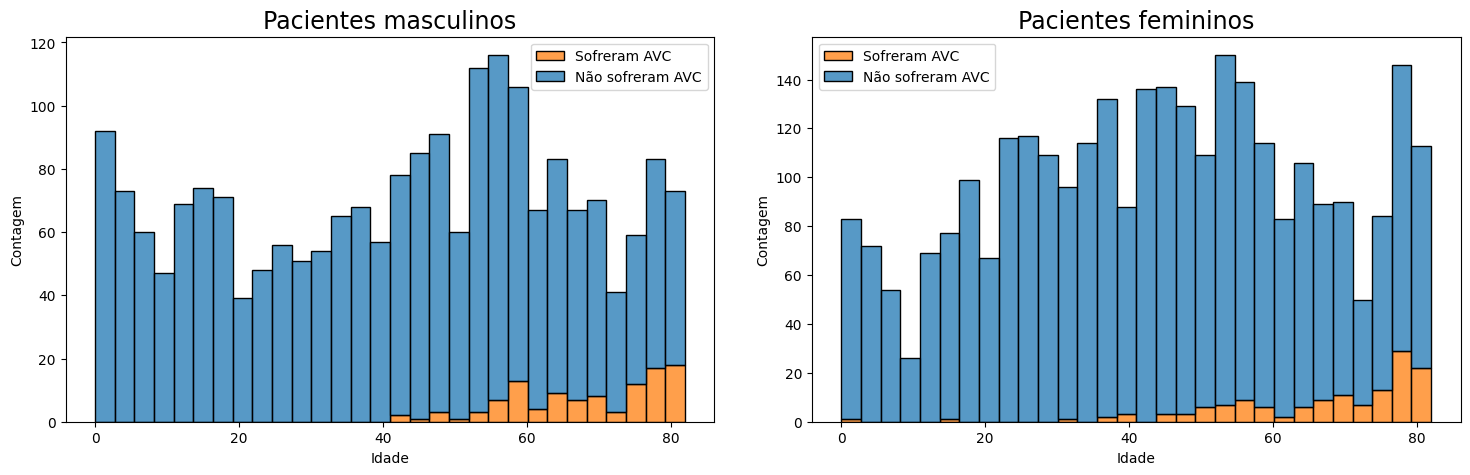

In [35]:
# Gráfico de distribuição (histograma)

# Definindo os subplots para plotagem dupla de gráfico
fig, ax = plt.subplots(figsize=(18,5), nrows=1, ncols=2)
plt.subplots_adjust(wspace=.15)

# Ajustando parâmetros dos gráficos
ax[0].set_title('Pacientes masculinos', fontsize=17)
ax[0].set_ylabel('Contagem')
ax[0].set_xlabel('Idade')
ax[1].set_title('Pacientes femininos', fontsize=17)
ax[1].set_ylabel('Contagem')
ax[1].set_xlabel('Idade')

# Criando os gráficos definindo o uso de 30 caixas pelo parâmetro 'bins' para melhor distribuição e realizando o comparativo através do parâmetro 'hue'
sns.histplot(data=df_m, x='idade',bins=30, hue='avc', multiple="stack", ax=ax[0])
sns.histplot(data=df_f, x='idade',bins=30, hue='avc', multiple="stack", ax=ax[1])

# Mudando a legenda para melhor interpretação
for i in range(ax.shape[0]):
    ax[i].legend(labels=['Sofreram AVC','Não sofreram AVC'])

Observamos que apesar de termos um número variado de pacientes entrevistados, o maior índice de pacientes femininas que sofreram um acidente vascular está na faixa dos 75-82 anos. Já entre os homens, a divisão está levemente mais distribuída, na faixa dos 58-82 anos.

## Relacionando condições dos pacientes com casos de AVC

### Análise numérica

In [36]:
# Definindo um dataframe apenas com valores de pacientes que sofreram um AVC
df_avc = df[df['avc'] == 1]
df_avc = df_avc[['genero', 'idade', 'hipertensao', 'doenca_cardiaca', 'nivel_medio_glucose', 'fumante', 'imc']]
df_avc.head()

,genero,idade,hipertensao,doenca_cardiaca,nivel_medio_glucose,fumante,imc
id,,,,,,,
9046,masculino,67,0,1,228.69,parou_de_fumar,36.6
51676,feminino,61,0,0,202.21,nunca_fumou,29.3
31112,masculino,80,0,1,105.92,nunca_fumou,32.5
60182,feminino,49,0,0,171.23,fuma,34.4
1665,feminino,79,1,0,174.12,nunca_fumou,24.0


In [37]:
# Analisando alguns dados de agrupamentos relacionados à idade e imc 
genero_avc = df_avc.groupby('genero')
df_agrupado = genero_avc[['idade', 'imc', 'nivel_medio_glucose']].agg(['median', 'max', 'min'])
df_agrupado

idade            imc             nivel_medio_glucose               
          median max min median   max   min              median     max    min
genero                                                                        
feminino    72.0  82   1  28.80  56.6  16.9              97.920  263.32  57.92
masculino   70.5  82  42  29.75  45.9  20.2             115.435  271.74  56.11

In [38]:
# Melhorando a visualização do dataframe
# O objetivo será pivotar o dataframe de modo que o gênero esteja nas colunas e as medidas agregadas sejam mostradas nas linhas

# Retirando a multi-indexação mapeando os índices de segundo nível e os juntando com os de primeiro nível
df_agrupado.columns = df_agrupado.columns.map('_'.join)

# Transformando o índice 'genero' em coluna
df_agrupado.reset_index(inplace=True)

# Pegando os identificadores de cada coluna e os colocando em linha com seus respectivos valores
agrupamento_derretido = df_agrupado.melt(id_vars=['genero'], var_name='colunas', value_name='valores')

# Separando coluna de índices agrupados anteriormente e os adicionando em duas novas colunas para pivotar a tabela
# Nosso objetivo será manter uma multi-indexação, porém nas linhas ao invés de ser nas colunas
regex_colunas = '(\w+)_(\w+)'
agrupamento_derretido[['indices', 'funcoes']] = agrupamento_derretido['colunas'].str.extract(regex_colunas)

# Pivotando novamente a tabela, transformando em um modelo mais compacto
df_medidas_genero = agrupamento_derretido.pivot_table(index=['indices', 'funcoes'], columns='genero', values='valores')
df_medidas_genero

genero                       feminino  masculino
indices             funcoes                     
idade               max         82.00     82.000
                    median      72.00     70.500
                    min          1.00     42.000
imc                 max         56.60     45.900
                    median      28.80     29.750
                    min         16.90     20.200
nivel_medio_glucose max        263.32    271.740
                    median      97.92    115.435
                    min         57.92     56.110

In [39]:
df_avc.groupby('genero')['nivel_medio_glucose'].median()

genero
feminino      97.920
masculino    115.435
Name: nivel_medio_glucose, dtype: float64

### Plotagem

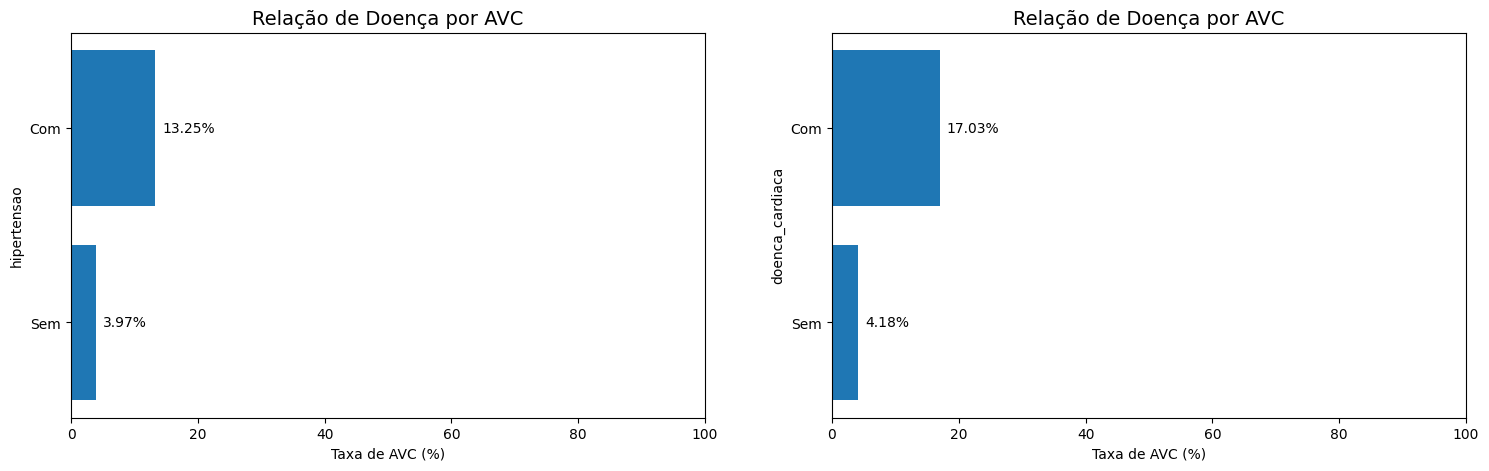

In [40]:
# Gráfico de Colunas

# Definindo lista de doencas para avaliar a relação com AVC
doencas = ['hipertensao', 'doenca_cardiaca']

# Definindo tamanho da figure, bem como o número de gráficos que serão plotados
fig, ax = plt.subplots(figsize=(18,5), nrows=1, ncols=2)

# Percorrendo a lista de doenças para plotagem dos gráficos dinamicamente
for i, doenca in enumerate(doencas, 0):

    # Criando tabela cruzada de taxa de incidência entre pessoas com a doença e pessoas que sofreram AVC
    crosstab = pd.crosstab(df[doenca], df['avc'], normalize='index') * 100

    # Plotagem do gráfico de barras indicando apenas os números de incidência de AVC
    grafico = ax[i].barh(np.arange(len(crosstab[1])), crosstab[1])

    # Mudando rótulos do eixo y para melhor interpretação e fixando limite de porcentagem do eixo x
    ax[i].set_yticks(np.arange(len(crosstab[1])), labels=['Sem','Com'])
    ax[i].set_xlim(right=100)

    # Adicionando títulos dos eixos e do gráfico
    ax[i].set_xlabel('Taxa de AVC (%)')
    ax[i].set_ylabel(f'{doenca}')
    ax[i].set_title('Relação de Doença por AVC', fontsize=14)

    # Adicionando rótulo de dados
    ax[i].bar_label(grafico, padding=5, fmt='{:.2f}%')
    

Percebemos que a tendência a sofrer um AVC cresce nos casos em que pessoas já sofrem com outras doenças crônicas como hipertensão ou doença cardiovascular.

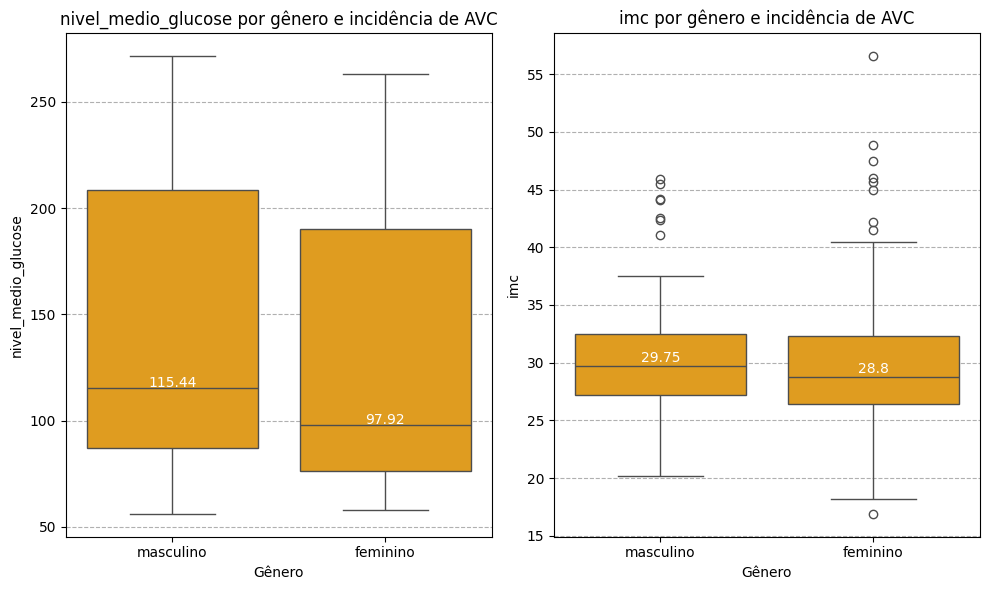

In [41]:
# Gráfico Boxplot

fig, ax = plt.subplots(figsize=(10, 6), nrows=1, ncols=2, layout='tight')

# Definindo lista de condicoes para avaliar a relação com AVC
condicoes = ['nivel_medio_glucose', 'imc']

# Plotando gráfico na figure e adicionando detalhes na visualização
for i, condicao in enumerate(condicoes):
        
    sns.boxplot(x='genero', y=condicao, color='orange', data=df_avc, ax=ax[i])
    ax[i].set_title(f'{condicao} por gênero e incidência de AVC')
    ax[i].set_ylabel(f'{condicao}')
    ax[i].set_xlabel('Gênero')
    ax[i].grid(axis='y', linestyle='--')
    

    # Percorrendo conteúdo do gráfico para adicionar rótulos
    for j, posicao_x in enumerate(ax[i].get_xticks()):
        
        # Pegando medidas do dataframe para adicionar como rótulo de dados
        mediana_por_genero = df_avc.groupby('genero', sort=False)[f'{condicao}'].median()
        
        ax[i].text(posicao_x,
                mediana_por_genero.iloc[j]+0.3,
                round(mediana_por_genero.iloc[j], 2),
                color='w',
                ha='center'
               )


Com isso, constatamos:
- Dentre os que sofreram um AVC, a concentração do nível de açúcar no sangue varia, entre a mediana (para homens e mulheres respectivamente: 115 e 98) e o terceiro quartil em valores de aproximadamente 100 a 206.
- Com relação ao Índice de Massa Corporal, identificamos primeiramente uma quantidade de outliers com valores elevado. Os valores presentes entre a mediana e o 3º quartil indicam valores que tendem à pré-obesidade em adultos acima de 20 anos. \
Isso indica que a alta concentração de açúcar no sangue e o sobrepeso são fatores de risco para o AVC.

## Conclusões

- De um total de 5110 entrevistados, 249 sofreram um Acidente Vascular Cerebral.
- A maioria das pessoas que sofreram um AVC trabalham em setor privado e são/já foram casadas.
- O índice de acidentes começa a partir dos 40 anos, com tendência a aumentar conforme os anos vão passando.
- Doenças como hipertensão e doença cardíaca, bem como alto nível de glicose no sangue e peso acima da média são fatores que contribuem para o alto risco de incidência de AVC.

In [42]:
# Gerando arquivo .csv com os dados tratados
df.to_csv('cleaned_healthcare_stroke_dataset.csv', index=False)